Button(description='Refresh Plot', style=ButtonStyle())

Output()

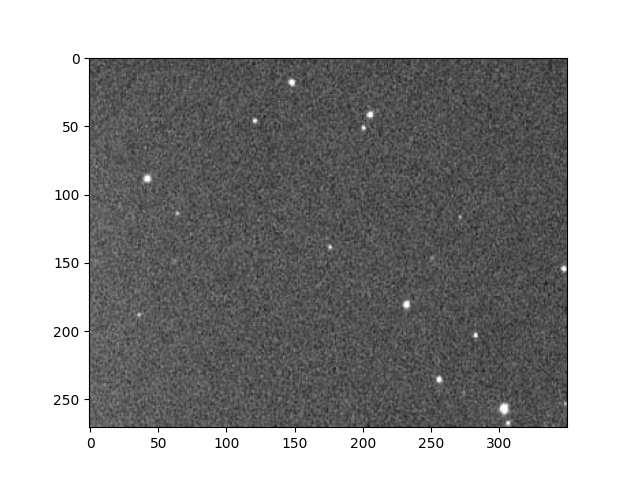

In [6]:
from typing import Tuple
from matplotlib.backend_bases import MouseEvent

# Import required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display, clear_output

#necessary magic line.
%matplotlib widget 

class ImageClicker:

    def __init__(self, file_name: str):
        self.coords = []
        self.file_name = file_name

        self.refresh_button = widgets.Button(description="Refresh Plot")
        self.output = widgets.Output()
        self.fig = None
        self.ax = None
        self.cid = None
    
    def get_coords(self) -> Tuple[float, float]:
        return self.coords
    
    def run_plot_context(self) -> None:

        def initialize_image() -> None:
            img = mpimg.imread(self.file_name)
            self.ax.imshow(img)
            self.fig.canvas.draw()

        def onclick(event : MouseEvent) -> None:
            # Store the x and y coordinates
            ix, iy = event.xdata, event.ydata
            self.coords.append((ix, iy))
            
            # Add a circle with crosshair on the image
            self.ax.scatter(ix, iy, color='red', s=100, marker='o', facecolor='none')
            self.ax.scatter(ix, iy, color='red', s=100, marker='+', lw=0.5)
            self.fig.canvas.draw()

            # Stop the event handler after two points are clicked
            if len(self.coords) >= 2:
                self.fig.canvas.mpl_disconnect(self.cid)
                #TODO: Convert coordinates into RA and DEC
                # print("Coordinates captured:", coords)

        
        display(self.refresh_button)
        display(self.output)

        # Display the initial figure
        with self.output:
            clear_output(wait=True)
            self.fig, self.ax = plt.subplots()
            # Connect the click event to the handler
            self.cid = self.fig.canvas.mpl_connect('button_press_event', onclick)

            def refresh_plot(b: widgets.Button) -> None:
                self.coords = []
                with self.output:
                    self.ax.clear()
                    self.cid = self.fig.canvas.mpl_connect('button_press_event', onclick)
                    initialize_image()

            self.refresh_button.on_click(refresh_plot)
            initialize_image()

image_name = 'sample.jpeg'
clicker = ImageClicker(image_name)
clicker.run_plot_context()

In [7]:
clicker.get_coords()

[(101.91071428571429, 144.23863636363635),
 (215.56060606060612, 114.90963203463201)]